In [73]:
import argparse
import errno
import os
import gudhi
import sys
import matplotlib.pyplot as plt
%matplotlib widget

##############################################################
EuclideanStrongWitnessComplex creation from points read in a OFF file
EuclideanStrongWitnessComplex with max_edge_length=1.0 - Number of landmarks=20
Number of simplices (weak) = 242
Number of simplices (strong) = 205
(weak) betti_numbers()=
[1, 0, 0]
(strong) betti_numbers()=
[1, 4, 0]


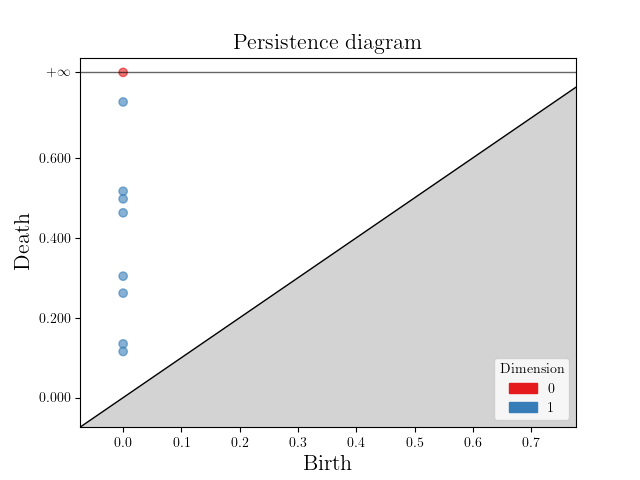

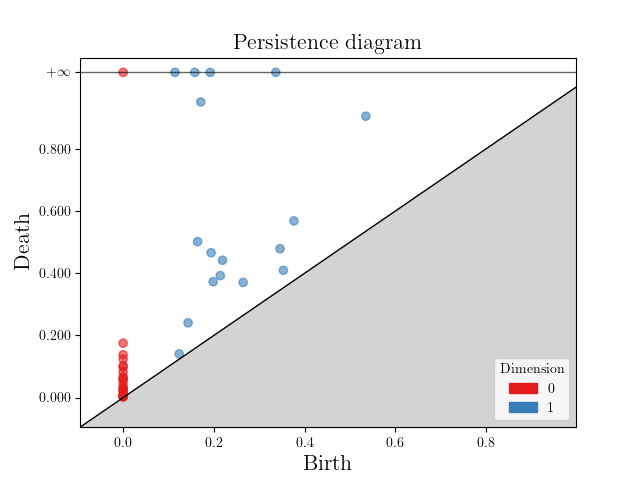

In [76]:
#!/usr/bin/env python



sys.argv = [
    'notebook',  # script name (dummy)
    '-f', '/home/unipi/i.inuso/Develop/unipi-lab-comp-project/tore3D_300.off',  # file path - adjust as needed
    '-a', '1.0',  # max_alpha_square
    '-n', '20',  # number_of_landmarks
    '-d', '3'    # limit_dimension
]

parser = argparse.ArgumentParser(
    description="EuclideanStrongWitnessComplex creation from "
    "points read in a OFF file.",
    epilog="Example: "
    "example/euclidean_strong_witness_complex_diagram_persistence_from_off_file_example.py "
    "-f ../data/points/tore3D_300.off -a 1.0 -n 20 -d 2"
    "- Constructs a strong witness complex with the "
    "points from the given OFF file.",
)
parser.add_argument("-f", "--file", type=str, required=True)
parser.add_argument("-a", "--max_alpha_square", type=float, required=True)
parser.add_argument("-n", "--number_of_landmarks", type=int, required=True)
parser.add_argument("-d", "--limit_dimension", type=int, required=True)
parser.add_argument("-b", "--band", type=float, default=0.0)
parser.add_argument(
    "--no-diagram",
    default=False,
    action="store_true",
    help="Flag for not to display the diagrams",
)

args = parser.parse_args()

with open(args.file) as f:
    first_line = f.readline()
    if (first_line == "OFF\n") or (first_line == "nOFF\n"):
        print("##############################################################")
        print("EuclideanStrongWitnessComplex creation from points read "\
            "in a OFF file")

        witnesses = gudhi.read_points_from_off_file(off_file=args.file)
        landmarks = gudhi.pick_n_random_points(
            points=witnesses, nb_points=args.number_of_landmarks
        )

        message = (
            "EuclideanStrongWitnessComplex with max_edge_length="
            + repr(args.max_alpha_square)
            + " - Number of landmarks="
            + repr(args.number_of_landmarks)
        )
        print(message)

        strong_witness_complex = gudhi.EuclideanStrongWitnessComplex(
            witnesses=witnesses, landmarks=landmarks
        )
        strong_simplex_tree = strong_witness_complex.create_simplex_tree(
            max_alpha_square=args.max_alpha_square,
            limit_dimension=args.limit_dimension
        )

        witness_complex = gudhi.EuclideanWitnessComplex(
            witnesses=witnesses, landmarks=landmarks
        )
        simplex_tree = witness_complex.create_simplex_tree(
            max_alpha_square=args.max_alpha_square, limit_dimension=args.limit_dimension
        )

        message = "Number of simplices (weak) = " + repr(simplex_tree.num_simplices())
        print(message)

        message = "Number of simplices (strong) = " + repr(strong_simplex_tree.num_simplices())
        print(message)

        diag = simplex_tree.persistence()
        strong_diag = strong_simplex_tree.persistence()

        print("(weak) betti_numbers()=")
        print(simplex_tree.betti_numbers())

        print("(strong) betti_numbers()=")
        print(strong_simplex_tree.betti_numbers())

        if args.no_diagram == False:
            gudhi.plot_persistence_diagram(diag, band=args.band)
            plt.show()
            gudhi.plot_persistence_diagram(strong_diag, band=args.band)
            plt.show()
    else:
        raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT),
                                args.file)

    f.close()


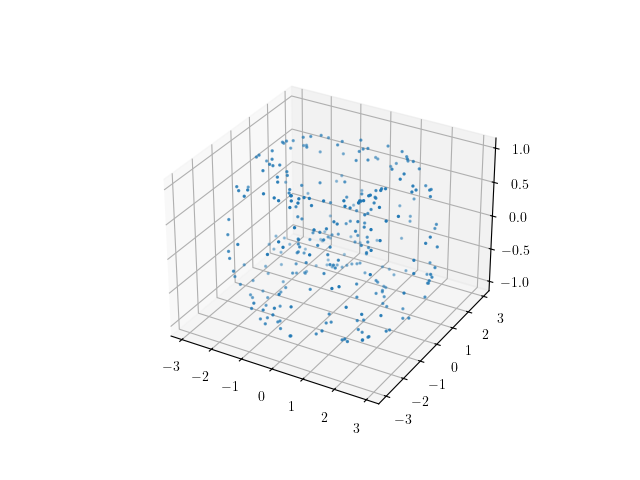

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(witnesses[:, 0], witnesses[:, 1], witnesses[:, 2], s=2)
plt.show()